In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./data/Book.xlsx')
import theano
theano.__version__

'1.0.4'

In [3]:
mins = []
for r in range(len(data)):
    mins.append(data.iloc[r]['time']//60) 
    
data['minute'] = mins

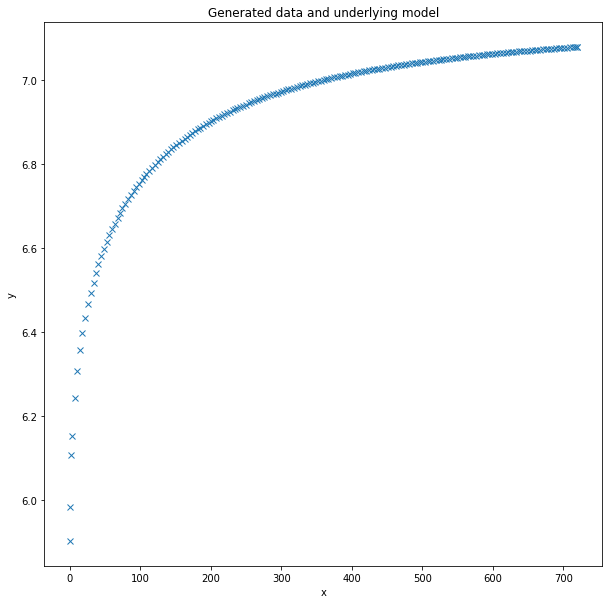

In [20]:
#print(data)
#x = data['minute']
#T = data['Temperature']
#y = data['V(vref)']
#print(x)
#print(T)
#print(y.shape)
x = data[data['Temperature'] == 45]['minute']
y = data[data['Temperature'] == 45]['V(vref)']
#temp = np.array(data['Temperature'])
#time = np.array(data['minute'])
#x_ = data[data['time'] == 0]['Temperature']
#y_ = data[data['time'] == 0]['V(vref)']
#y = data[data[]]
#fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
#ax.plot(data['time'], data['V(vref)'], 'x', label='sampled data')
#ax.plot(x, true_regression_line, label='true regression line', lw=2.)
#plt.legend(loc=0);
#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
#ax.plot(x, y, 'x', label='sampled data')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')

In [21]:
model_isfet = pm.Model()
'''
with model_isfet:
    mu_a = pm.Uniform('mu_a',0,20)
    sd_a = pm.Uniform('sd_a',0,20)
    mu_b = pm.Uniform('mu_b',0,20)
    sd_b = pm.Uniform('sd_b',0,20)
    alpha = pm.Normal('alpha', mu=mu_a, sigma=sd_a)
    beta = pm.Normal('beta', mu=mu_b, sigma=sd_b)
    epsilon = pm.Uniform('epsilon', 0,20)
    sd_vref = pm.Uniform('vref_sd', 0,1)
    voltage = pm.Normal('Voltage',mu=alpha*temp + beta*time + epsilon, sigma=sd_vref,observed=y)
    trace = sample(3000, cores=2)
'''
with model_isfet:
    alpha = pm.Uniform('alpha',0,15)
    beta = pm.Uniform('beta',0,15)
    epsilon = pm.Uniform('epsilon', 0,20)
    sd_vref = pm.Uniform('vref_sd', 0,1)
    voltage = pm.Normal('Voltage',mu = epsilon - alpha*np.exp(-beta*x), sigma=sd_vref,observed=y)
    step = pm.Metropolis()
    trace = pm.sample(200000, step=step, cores=6)

Multiprocess sampling (6 chains in 6 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 6 chains: 100%|████████████████████████████████████████████████| 1203000/1203000 [09:38<00:00, 2078.02draws/s]
The number of effective samples is smaller than 10% for some parameters.


[[7.04317523]
 [7.04317523]
 [7.04317523]
 ...
 [7.03927578]
 [7.04221995]
 [7.04221995]]


C:\Users\Kyanite\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kyanite\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
C:\Users\Kyanite\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


"\n%matplotlib inline\n\nfrom pymc3 import  *\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nsize = 200\ntrue_intercept = 1\ntrue_slope = 2\n\nx = np.linspace(0, 1, size)\n# y = a + b*x\ntrue_regression_line = true_intercept + true_slope * x\n# add noise\ny = true_regression_line + np.random.normal(scale=.5, size=size)\n\ndata = dict(x=x, y=y)\n\nfig = plt.figure(figsize=(7, 7))\nax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')\nax.plot(x, y, 'x', label='sampled data')\nax.plot(x, true_regression_line, label='true regression line', lw=2.)\nplt.legend(loc=0);\n"

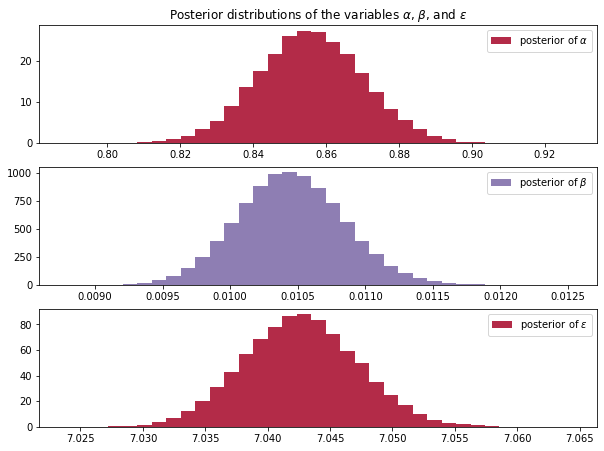

In [22]:
print(trace["epsilon"][::3][1000:,None])
epsilon_samples = trace["epsilon"][::3][1000:,None]
alpha_samples = trace["alpha"][::3][1000:,None]  # best to make them 1d
beta_samples = trace["beta"][::3][1000:,None]

fig = plt.figure(figsize=(10, 10))
#histogram of the samples:
plt.subplot(411)
plt.title(r"Posterior distributions of the variables $\alpha$, $\beta$, and $\epsilon$")
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#A60628", normed=True)
plt.legend();

plt.subplot(412)
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#7A68A6", normed=True)
plt.legend()

plt.subplot(413)
plt.hist(epsilon_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\epsilon$", color="#A60628", normed=True)
plt.legend();

'''
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);
'''

In [23]:
epsilon_mean = epsilon_samples.mean()
alpha_mean = alpha_samples.mean()
beta_mean = beta_samples.mean()
print(epsilon_mean, alpha_mean, beta_mean)

7.042620228152531 0.8556827247377156 0.010451498010423436


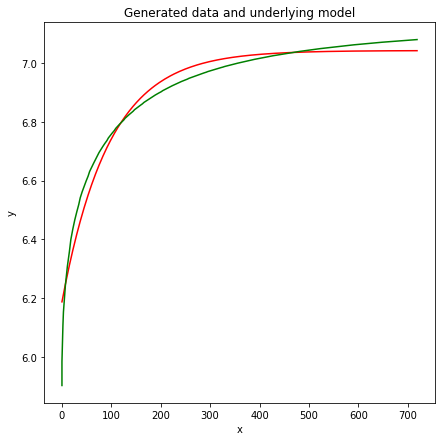

In [24]:
fig = plt.figure(figsize=(7, 7))
y_pred = epsilon_mean - alpha_mean*np.exp(-beta_mean*x)
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y_pred, 'r', label='sampled data')
ax.plot(x, y, 'g')